512

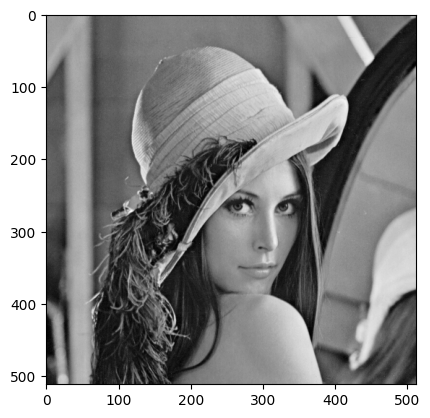

In [28]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('/content/drive/MyDrive/opencv_courcera/New folder/WORK/image processing with opencv/lenna.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

import numpy as np
image_array=np.array(image)

image.shape[-1]

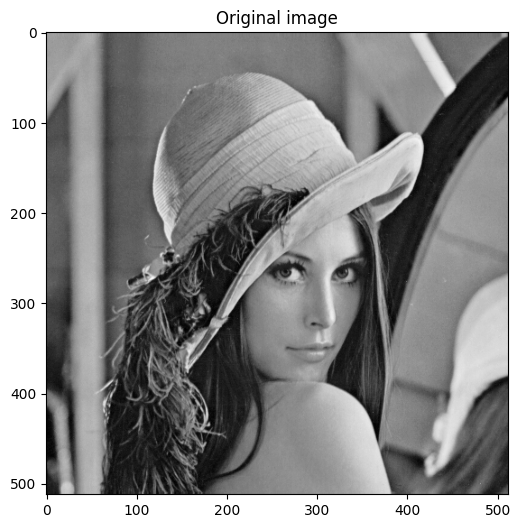

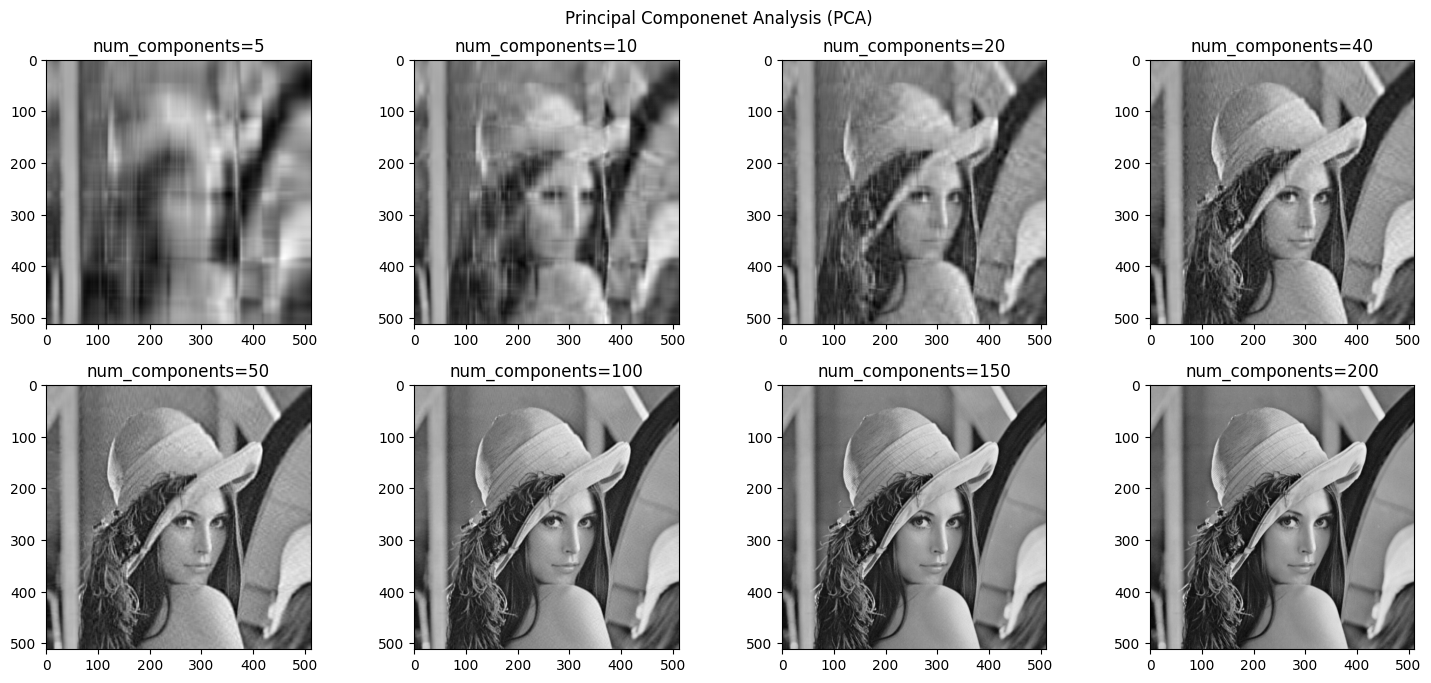

In [50]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('/content/drive/MyDrive/opencv_courcera/New folder/WORK/image processing with opencv/lenna.png',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.title('Original image')
plt.imshow(image,cmap='gray')
plt.show()

import numpy as np
image_array=np.array(image)

def PCA(X, num_components):

    X=X.reshape(-1,X.shape[-1]) # reshape the data
    mean=np.mean(X,axis=0)

    x_center = X - mean #(x - x_bar)

    S = np.cov(X,rowvar=False)  # covariance matrix, each column is typically considered a variable (feature)

    # eigen vectors and eigen value
    eig_val, eig_vec = np.linalg.eigh(S)

    sorted_eig  = np.argsort(-eig_val) # sorting the eigen values in decreasing order
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]

    U = eig_vec[:, range(num_components)]
    #The num_components parameter in PCA (Principal Component Analysis)
    #represents the number of principal components you want to retain while performing dimensionality reduction.

    #reconstruct the images from the lowerdimensional representation
    #to do this, we first need to find the projection_matrix
    #(which you implemented earlier)
    #which projects our input data onto the vector space spanned
    #by the eigenvectors



    x_pca=x_center @ U     # Project the data onto the lower-dimensional space

    x_reconstructed = x_pca @ U.T + mean  # Reconstruct the data from the lower-dimensional representation

    x_reconstructed.reshape(image_array.shape)

    return x_reconstructed



print()

num_components = [5,10,20,40,50,100,150,200]   #number of principal components
plt.figure(figsize=(15, 10))
for i in range(len(num_components)):

  out_matrix = PCA(image_array, num_components[i])
  plt.suptitle('Principal Componenet Analysis (PCA)')

  plt.subplot(3,len(num_components)//2,i+1)
  plt.imshow(out_matrix, cmap='gray')
  plt.title(f'num_components={num_components[i]}')

plt.tight_layout()
plt.show()







In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/opencv_courcera/New folder/WORK/image processing with opencv/lenna.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Convert the image to a numpy array
image_array = np.array(image)

def PCA(X, num_components):
    # Reshape the input matrix to have each column as a data point
    X = X.reshape(-1, X.shape[-1])

    # Center the data
    mean = np.mean(X, axis=0)
    X_centered = X - mean  #(x-x_bar)

    # Compute the covariance matrix
    S = np.cov(X_centered, rowvar=False)

    # Eigen decomposition
    eig_val, eig_vec = np.linalg.eigh(S)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(-eig_val)
    eig_val = eig_val[sorted_indices]
    eig_vec = eig_vec[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    U = eig_vec[:, :num_components]

    # Project the data onto the lower-dimensional space
    X_pca = X_centered @ U

    # Reconstruct the data from the lower-dimensional representation
    X_reconstructed = X_pca @ U.T + mean

    # Reshape the reconstructed data to the original shape
    X_reconstructed = X_reconstructed.reshape(image_array.shape)

    return X_reconstructed

# Apply PCA
num_components = 255  # You can adjust this based on your requirement
out_matrix = PCA(image_array, num_components)

# Display the reconstructed image after PCA
plt.imshow(out_matrix, cmap='gray')
plt.title('Reconstructed Image after PCA')
plt.show()


In [29]:
import numpy as np

# Create a 3x4 matrix where each row is an observation, and each column is a variable
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])

# Calculate the covariance matrix with rowvar=True (default)
covariance_matrix_rowvar_true = np.cov(data, rowvar=True)

# Calculate the covariance matrix with rowvar=False
covariance_matrix_rowvar_false = np.cov(data, rowvar=False)

print("Covariance Matrix with rowvar=True:")
print(covariance_matrix_rowvar_true)

print("\nCovariance Matrix with rowvar=False:")
print(covariance_matrix_rowvar_false)



#std

Covariance Matrix with rowvar=True:
[[1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667]]

Covariance Matrix with rowvar=False:
[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]


In [3]:
def eig(S):
    #calculate the eigen values and eigen vectors
    eig_val, eig_vec = np.linalg.eigh(S)

    #sorting them in decrasing order
    sorted_eig  = np.argsort(-eig_val)
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]

    return (eig_val, eig_vec)